<a href="https://colab.research.google.com/github/ADutta007/ADutta007.github.io/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning WorkFlow


Sure, here are some notes on the code you've provided:

```python
import pandas as pd
```
This line imports the **pandas** library, which is a powerful data manipulation and analysis tool. It's particularly useful for working with structured data, such as tables of data.

```python
import numpy as np
```
This line imports the **numpy** library, which is a fundamental package for scientific computing in Python. It provides support for arrays, matrices, and many mathematical functions.

```python
import matplotlib.pyplot as plt
```
This line imports the **matplotlib.pyplot** module, which is a collection of functions that provide a MATLAB-like interface for making plots and charts.

```python
from sklearn import ensemble
```
This line imports the **ensemble** module from the **scikit-learn** library. Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).

```python
from sklearn import model_selection
```
This line imports the **model_selection** module from the **scikit-learn** library. This module includes classes and functions for splitting datasets, generating validation curves, and tuning the hyperparameters of estimators.

```python
from sklearn.metrics import confusion_matrix
```
This line imports the **confusion_matrix** function from the **sklearn.metrics** module. A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

```python
import gdal
```
This line imports the **GDAL** library, which stands for Geospatial Data Abstraction Library. It's a translator library for raster and vector geospatial data formats.

```python
from sklearn.preprocessing import normalize
```
This line imports the **normalize** function from the **sklearn.preprocessing** module. Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from osgeo import gdal
from sklearn.preprocessing import normalize



```python
data=pd.read_csv('/content/drive/MyDrive/day1.csv')
```
This line uses the **pandas** function `read_csv` to read the CSV file located at '/content/drive/MyDrive/day1.csv' and store it in a DataFrame object named `data`. The path to the file suggests that it's located in your Google Drive, and you're likely running this code in a Google Colab notebook.

```python
data.head()
```
This line uses the `head` method of the pandas DataFrame object. This method returns the first 5 rows of the DataFrame by default, but you can specify a different number as an argument if you want to see more or fewer rows. This is often used for quickly testing if your dataset has the right type of data in it. Please note that this line of code will not have any visible effect if it's run in a script without being printed or displayed in some other way. In a notebook environment like Jupyter or Google Colab, however, the result will be displayed automatically.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/day1.csv')
data.head()

,Unnamed: 0,segment,label,x,y,grn,red,nir,swir
0,0,6,other,607992.900195,3.420010e+06,74,66,121,73
1,1,6,other,607996.816748,3.419979e+06,81,73,116,68
2,2,6,other,607011.003356,3.420005e+06,71,59,122,60
3,3,6,wheat,607171.687553,3.419999e+06,73,61,106,60
4,4,6,wheat,607073.709583,3.419987e+06,58,43,160,57


Here are some notes on the new lines of code you've provided:

```python
segments =data['segment'].unique()
```
This line extracts the unique values from the 'segment' column of the `data` DataFrame and stores them in the `segments` variable. The `unique()` function is a pandas function that returns an array of unique values in order of appearance.

```python
np.random.shuffle(segments)
```
This line uses the `shuffle` function from numpy's `random` module to randomly shuffle the elements in the `segments` array in-place. This means that the order of elements in the `segments` array will be changed after this line is executed.

```python
n75 = int(len(segments)*.75)
```
This line calculates 75% of the length of the `segments` array (which is the number of unique segments), converts it to an integer, and stores the result in the `n75` variable.

```python
train_segs,test_segs =segments[:n75], segments[n75:]
```
This line splits the `segments` array into two parts at the index `n75`. The first part, which contains the first 75% of the elements, is stored in the `train_segs` variable. The second part, which contains the remaining elements, is stored in the `test_segs` variable.

In summary, this code is preparing a dataset for machine learning by splitting the unique segments into a training set (75% of the data) and a test set (the remaining 25% of the data). The data is shuffled before splitting to ensure that the training and test sets are random and representative.

In [ ]:
segments =data['segment'].unique()
np.random.shuffle(segments)

n75 = int(len(segments)*.75)
train_segs,test_segs =segments[:n75], segments[n75:]


This line of code will return the lengths of `train_segs` and `test_segs` as a list. The first element in the list will be the number of unique segments in the training set, and the second element will be the number of unique segments in the test set. This is a quick way to verify the size of your training and test sets after splitting.



In [ ]:
[len(train_segs),len(test_segs)]


[30, 11]

Here are some notes on the new lines of code you've provided:

```python
train =data[data['segment'].isin(train_segs)]
```
This line creates a new DataFrame `train` that only includes the rows from `data` where the 'segment' value is in `train_segs`. The `isin()` function is a method of pandas Series (a DataFrame column is a Series) that checks whether each element in the Series is contained in the passed iterable (in this case, `train_segs`) and returns a Boolean Series of the same length.

```python
test =data[data['segment'].isin(test_segs)]
```
This line does the same thing as the previous line, but for `test_segs` instead of `train_segs`. The resulting `test` DataFrame only includes the rows from `data` where the 'segment' value is in `test_segs`.

In summary, these two lines of code are splitting the `data` DataFrame into a training set and a test set based on the unique segments. The `train` DataFrame contains 75% of the unique segments, and the `test` DataFrame contains the remaining 25%.

In [ ]:
train =data[data['segment'].isin(train_segs)]
test =data[data['segment'].isin(test_segs)]

Here are some notes on the new lines of code you've provided:

```python
variables=['grn','red','nir','swir']
```
This line creates a list of strings that represent the names of the variables (presumably, these are the names of the columns in your DataFrame that contain the features you want to use for training your model).

```python
x_t = train[variables].values
y_t = train['label'].values
```
These lines extract the values of the features and the target variable from the training set. `x_t` will be a 2D numpy array containing the values of the features (green, red, near-infrared, and short-wave infrared bands), and `y_t` will be a 1D numpy array containing the values of the target variable ('label').

```python
x_v = test[variables].values
y_v = test['label'].values
```
These lines do the same thing as the previous two lines, but for the test set.

In summary, this code is preparing the feature matrices and target arrays that you will pass to the `fit` and `predict` methods of your machine learning model.

In [ ]:
variables=['grn','red','nir','swir']
x_t = train[variables].values
y_t = train['label'].values

x_v = test[variables].values
y_v = test['label'].values

In [ ]:
param_grid = {
    'bootstrap':[True],
    'max_depth': [8],
    'max_features' : [4],
    'min_samples_leaf' : [6,7,8],
    'min_samples_split' : [7],
    'n_estimators': [200,250]
}

rf = ensemble.RandomForestClassifier()
grid_search = model_selection.GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_t,y_t)
params = grid_search.best_params_
print(params)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'bootstrap': True, 'max_depth': 8, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 7, 'n_estimators': 250}


In [ ]:
rforest = ensemble.RandomForestClassifier(
    bootstrap=params['bootstrap'],
    max_depth=params['max_depth'],
    max_features=params['max_features'],
    min_samples_leaf=params['min_samples_leaf'],
    min_samples_split=params['min_samples_split'],
    n_estimators=params['n_estimators'],
    random_state=42
)
rforest.fit(x_t, y_t);

In [ ]:
rpred = rforest.predict(x_v)

In [ ]:
all_classes= data['label'].unique()
cm = normalize(confusion_matrix(
    y_v, rpred,
    labels = all_classes
))
cm

array([[0.99820419, 0.02605427, 0.05394048],
       [0.51160371, 0.81503087, 0.27200428],
       [0.14662668, 0.02620863, 0.98884464]])

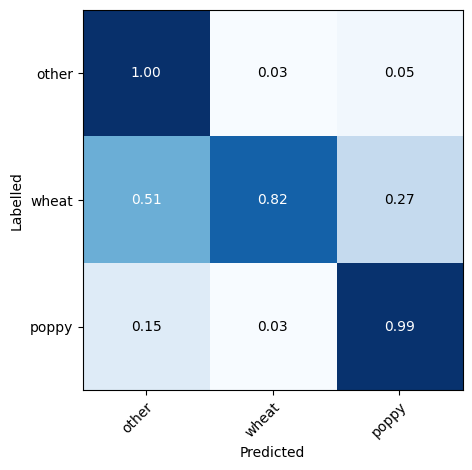

In [ ]:
fig, ax = plt.subplots()
ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# We want to show all ticks...
ax.set_xticks(np.arange(len(all_classes)))
ax.set_yticks(np.arange(len(all_classes)))
# ... and label them with the respective list entries
ax.set_xticklabels(all_classes)
ax.set_yticklabels(all_classes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(len(all_classes)):
    for j in range(len(all_classes)):
        text = ax.text(j, i, '{0:.2f}'.format(cm[i, j]),
                       ha="center", va="center",
                       color="w" if (cm[i, j] > thresh)or(cm[i, j]==0.) else "k")

ax.set_ylabel('Labelled')
ax.set_xlabel('Predicted')
ax.set_ylim(len(all_classes)-0.5, -0.5) # Bug fix!
fig.tight_layout()

In [ ]:
class_ii = cm.diagonal()
user = np.zeros(class_ii.shape)
user[class_ii!=0] = class_ii[class_ii!=0]/cm[:, class_ii!=0].sum(axis=0)
prod = np.zeros(class_ii.shape)
prod[class_ii!=0] = class_ii[class_ii!=0]/cm[class_ii!=0, :].sum(axis=1)

print(pd.DataFrame(
    data={'class':all_classes.tolist(),
          'User': user,
          'Prod': prod
         }))
print('Overall = {}'.format(class_ii.sum()/cm.sum()))

   class      User      Prod
0  other  0.602622  0.925807
1  wheat  0.939740  0.509828
2  poppy  0.752094  0.851220
Overall = 0.7299900332995528


In [ ]:
importances = rforest.feature_importances_
#importances.sum()
importances

array([0.1947006 , 0.60157662, 0.13413719, 0.06958558])

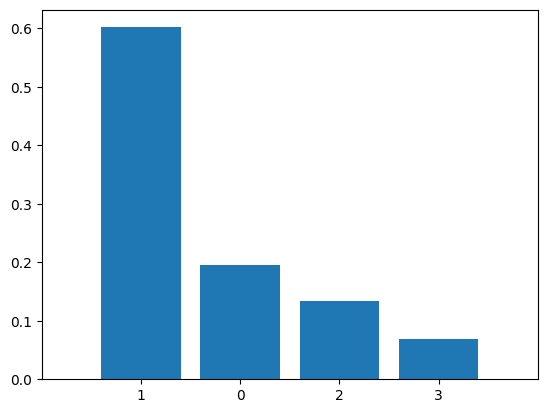

In [ ]:
indices = np.argsort(importances)[::-1]
x_features = range(x_t.shape[1])
fig, ax = plt.subplots()
ax.bar(x_features, importances[indices], align="center")
plt.xticks(x_features, indices)
ax.set_xlim([-1, x_t.shape[1]]);

In [ ]:
image=gdal.Open('/content/drive/MyDrive/data/spot5_k178_sub_02apr07.img')

In [ ]:
subset = image.ReadAsArray(3500,6000,1000,1000)
subset.shape

(4, 1000, 1000)

In [ ]:
nb,nr,nc = subset.shape
row_value = subset.transpose(1,2,0).reshape(nr*nc,nb)
row_value.shape

(1000000, 4)

In [ ]:
pred_all = rforest.predict(row_value)

In [ ]:
classified = pred_all.reshape(nr, nc)
remap = {
    'poppy': 2,
    'wheat': 4,
    'other': 3,

}
thematic = np.zeros(classified.shape)
for key in remap.keys():
  thematic[classified==key] = remap[key]

(-0.5, 999.5, 999.5, -0.5)

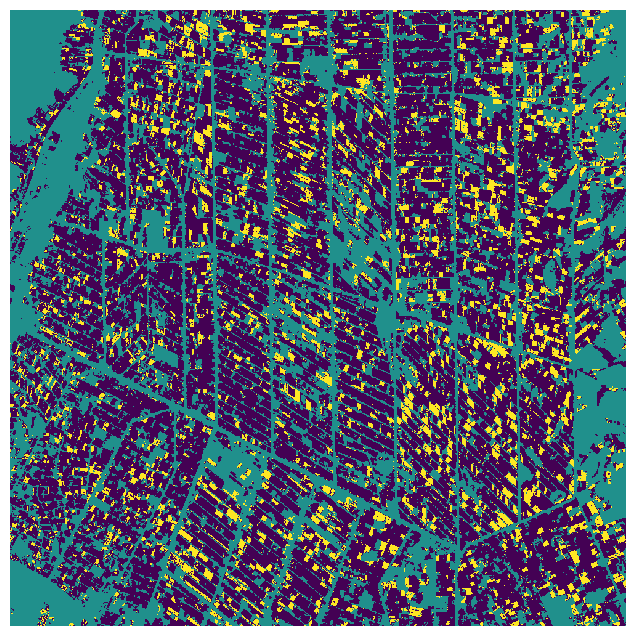

In [ ]:
fig, ax = plt.subplots(figsize =(8,8))
ax.imshow(thematic, interpolation = 'none')
ax.axis('off')